<a href="https://colab.research.google.com/github/Carlos1729/Transformers_Code/blob/main/Where_FineTuning_Fits_In.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import jsonlines
import itertools #for various iterable functions like count etc
import pandas as pd
from pprint import pprint # pprint stands for "pretty print" and is used to format and print data structures in a more readable way,
#especially useful for complex data like dictionaries and lists.
import datasets
from datasets import load_dataset
#It seems to be part of the Hugging Face datasets library, which provides a collection of datasets for natural language processing tasks.
#This library facilitates loading, accessing, and working with various datasets.This line imports the load_dataset function from the datasets module.
# The load_dataset function is likely used to load a specific dataset from the Hugging Face datasets library

In [2]:
!pip install jsonlines

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 38.8 MB/s eta 0:00:00


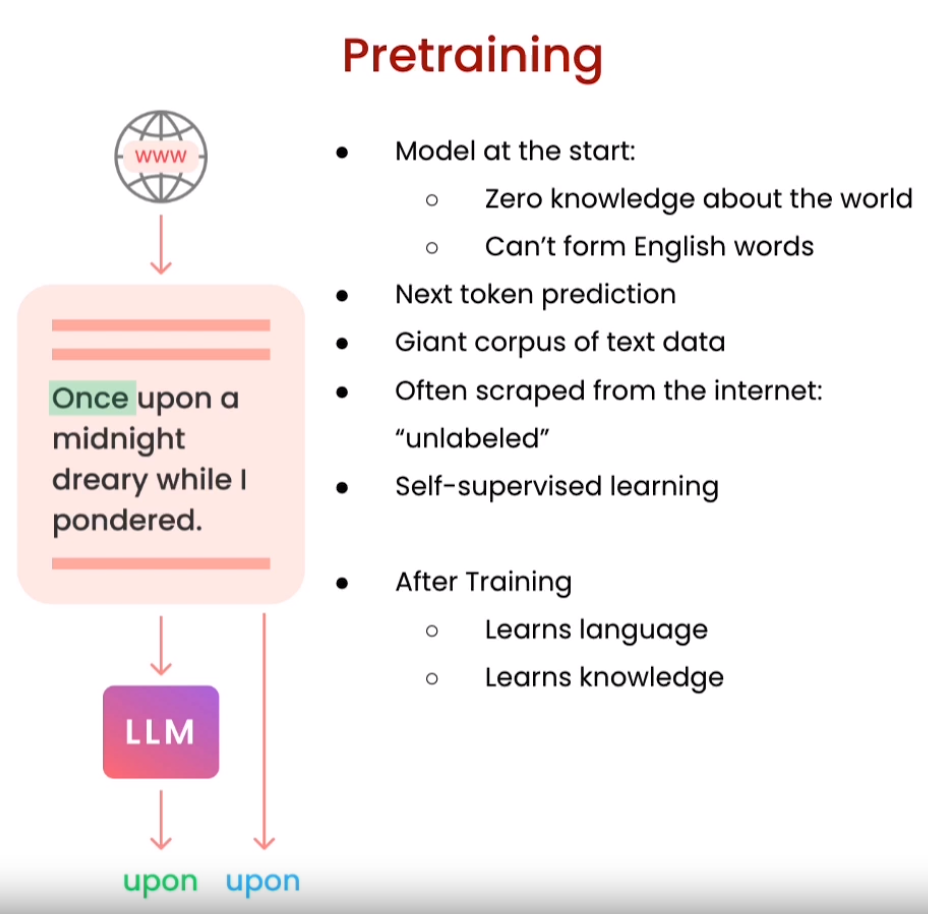

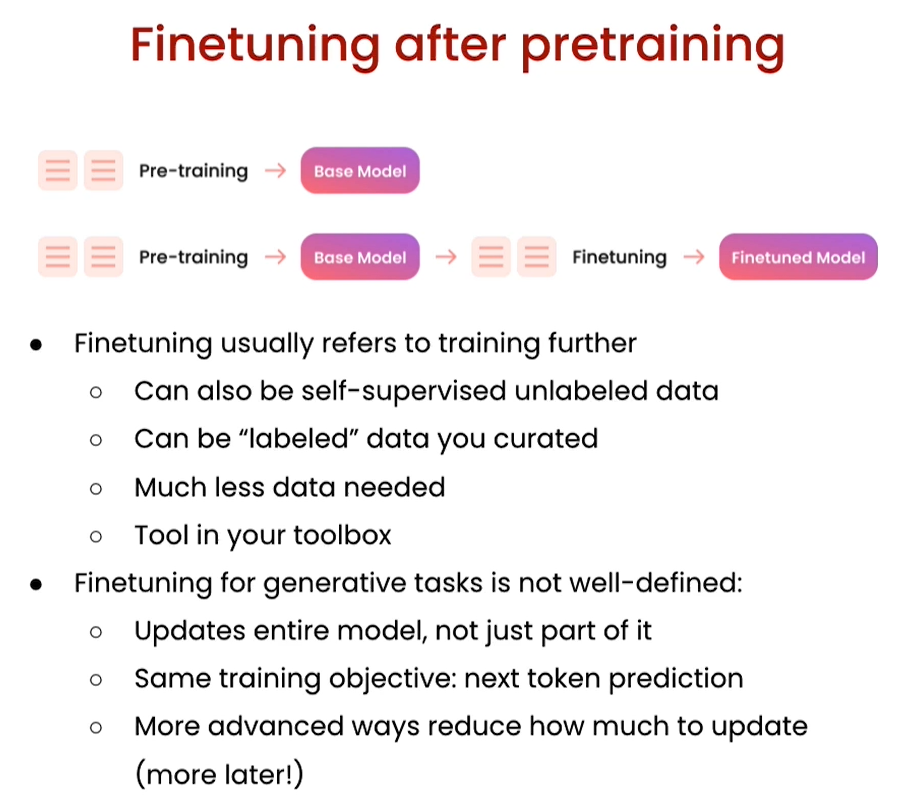

In [5]:
#pretrained_dataset = load_dataset("EleutherAI/pile", split="train", streaming=True)

pretrained_dataset = load_dataset("c4", "en", split="train", streaming=True)

In [6]:
n = 5
print("Pretrained dataset:")
top_n = itertools.islice(pretrained_dataset, n)
for i in top_n:
  print(i)

Pretrained dataset:
{'text': 'Beginners BBQ Class Taking Place in Missoula!\nDo you want to get better at making delicious BBQ? You will have the opportunity, put this on your calendar now. Thursday, September 22nd join World Class BBQ Champion, Tony Balay from Lonestar Smoke Rangers. He will be teaching a beginner level class for everyone who wants to get better with their culinary skills.\nHe will teach you everything you need to know to compete in a KCBS BBQ competition, including techniques, recipes, timelines, meat selection and trimming, plus smoker and fire information.\nThe cost to be in the class is $35 per person, and for spectators it is free. Included in the cost will be either a t-shirt or apron and you will be tasting samples of each meat that is prepared.', 'timestamp': '2019-04-25T12:57:54Z', 'url': 'https://klyq.com/beginners-bbq-class-taking-place-in-missoula/'}
{'text': 'Discussion in \'Mac OS X Lion (10.7)\' started by axboi87, Jan 20, 2012.\nI\'ve got a 500gb inter

In [7]:
dataset = load_dataset("kotzeje/lamini_docs.jsonl")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1400 [00:00<?, ? examples/s]

In [8]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 1400
    })
})

In [10]:
dataset['train']

Dataset({
    features: ['question', 'answer'],
    num_rows: 1400
})

In [11]:
dataset['train'][0]

{'question': 'How can I evaluate the performance and quality of the generated text from Lamini models?',
 'answer': "There are several metrics that can be used to evaluate the performance and quality of generated text from Lamini models, including perplexity, BLEU score, and human evaluation. Perplexity measures how well the model predicts the next word in a sequence, while BLEU score measures the similarity between the generated text and a reference text. Human evaluation involves having human judges rate the quality of the generated text based on factors such as coherence, fluency, and relevance. It is recommended to use a combination of these metrics for a comprehensive evaluation of the model's performance."}

In [12]:
instruction_dataset_df = dataset["train"].to_pandas()

In [13]:
instruction_dataset_df

,question,answer
0,How can I evaluate the performance and quality...,There are several metrics that can be used to ...
1,Can I find information about the code's approa...,"Yes, the code includes methods for submitting ..."
2,How does Lamini AI handle requests for generat...,Lamini AI offers features for generating text ...
3,Does the `submit_job()` function expose any ad...,It is unclear which `submit_job()` function is...
4,Does the `add_data()` function support differe...,"No, the `add_data()` function does not support..."
...,...,...
1395,Does Lamini have the ability to understand and...,"Yes, Lamini has the ability to understand and ..."
1396,Can I fine-tune the pre-trained models provide...,"Yes, you can fine-tune the pre-trained models ..."
1397,Can Lamini generate text that is suitable for ...,"Yes, Lamini can generate text that is suitable..."
1398,Does the documentation have a secret code that...,I wish! This documentation only talks about La...


### Various ways of formatting your data

In [14]:
examples = instruction_dataset_df.to_dict()
text = examples["question"][0] + examples["answer"][0]
text

"How can I evaluate the performance and quality of the generated text from Lamini models?There are several metrics that can be used to evaluate the performance and quality of generated text from Lamini models, including perplexity, BLEU score, and human evaluation. Perplexity measures how well the model predicts the next word in a sequence, while BLEU score measures the similarity between the generated text and a reference text. Human evaluation involves having human judges rate the quality of the generated text based on factors such as coherence, fluency, and relevance. It is recommended to use a combination of these metrics for a comprehensive evaluation of the model's performance."

In [15]:
if "question" in examples and "answer" in examples:
  text = examples["question"][0] + examples["answer"][0]
elif "instruction" in examples and "response" in examples:
  text = examples["instruction"][0] + examples["response"][0]
elif "input" in examples and "output" in examples:
  text = examples["input"][0] + examples["output"][0]
else:
  text = examples["text"][0]

In [16]:
prompt_template_qa = """### Question:
{question}

### Answer:
{answer}"""

In [17]:
question = examples["question"][0]
answer = examples["answer"][0]

text_with_prompt_template = prompt_template_qa.format(question=question, answer=answer)
text_with_prompt_template

"### Question:\nHow can I evaluate the performance and quality of the generated text from Lamini models?\n\n### Answer:\nThere are several metrics that can be used to evaluate the performance and quality of generated text from Lamini models, including perplexity, BLEU score, and human evaluation. Perplexity measures how well the model predicts the next word in a sequence, while BLEU score measures the similarity between the generated text and a reference text. Human evaluation involves having human judges rate the quality of the generated text based on factors such as coherence, fluency, and relevance. It is recommended to use a combination of these metrics for a comprehensive evaluation of the model's performance."

In [18]:
prompt_template_q = """### Question:
{question}

### Answer:"""

In [19]:
question = examples["question"][0]
answer = examples["answer"][0]

text_with_prompt_template = prompt_template_q.format(question=question, answer=answer)
text_with_prompt_template

'### Question:\nHow can I evaluate the performance and quality of the generated text from Lamini models?\n\n### Answer:'

In [20]:
# The difference between the two prompting mechanisms you've provided, `prompt_template_qa` and `prompt_template_q`, lies in the presence of the "Answer" section in the prompts.

# 1. **prompt_template_qa**:

#    ```
#    ### Question:
#    {question}

#    ### Answer:
#    {answer}
#    ```

#    In this mechanism, the prompt includes both the question and the answer sections.
# When you use this prompt to generate text or responses, the model is provided with both a question and an answer template,
# and it's expected to fill in the blanks or generate content for both parts.

# 2. **prompt_template_q**:

#    ```
#    ### Question:
#    {question}

#    ### Answer:
#    ```

#    In this mechanism, the prompt only includes the question section, and there is no specific answer template provided. When you use this
#  prompt, the model is primarily focused on generating a response to the question, but it is not explicitly instructed on how to structure or include an answer in its output.

# The choice between these two prompting mechanisms depends on your specific use case and what you expect from the model's response.
#  Here are some considerations:

# - **prompt_template_qa (with Answer Template)**: Use this if you want to guide the model to provide a complete response that includes
# both the question and the answer. This can be useful when you want the model to generate structured Q&A pairs or complete responses to
#  questions.

# - **prompt_template_q (Question Only)**: Use this if you want a more open-ended response from the model, where it generates a response
# to the question without being constrained by a specific answer format. This approach allows the model more flexibility in its response.

# In many cases, the choice will depend on the specific task and the desired format of the generated content. If you need a clear separation of questions and answers, the `prompt_template_qa` can be more suitable. If you want the model to generate more flexible and context-aware responses, the `prompt_template_q` may be a better option.

In [21]:
num_examples = len(examples["question"])
finetuning_dataset_text_only = []
finetuning_dataset_question_answer = []
for i in range(num_examples):
  question = examples["question"][i]
  answer = examples["answer"][i]

  text_with_prompt_template_qa = prompt_template_qa.format(question=question, answer=answer)
  finetuning_dataset_text_only.append({"text": text_with_prompt_template_qa})

  text_with_prompt_template_q = prompt_template_q.format(question=question)
  finetuning_dataset_question_answer.append({"question": text_with_prompt_template_q, "answer": answer})

In [22]:
finetuning_dataset_text_only

[{'text': "### Question:\nHow can I evaluate the performance and quality of the generated text from Lamini models?\n\n### Answer:\nThere are several metrics that can be used to evaluate the performance and quality of generated text from Lamini models, including perplexity, BLEU score, and human evaluation. Perplexity measures how well the model predicts the next word in a sequence, while BLEU score measures the similarity between the generated text and a reference text. Human evaluation involves having human judges rate the quality of the generated text based on factors such as coherence, fluency, and relevance. It is recommended to use a combination of these metrics for a comprehensive evaluation of the model's performance."},
 {'text': "### Question:\nCan I find information about the code's approach to handling long-running tasks and background jobs?\n\n### Answer:\nYes, the code includes methods for submitting jobs, checking job status, and retrieving job results. It also includes a

In [23]:
finetuning_dataset_question_answer

[{'question': '### Question:\nHow can I evaluate the performance and quality of the generated text from Lamini models?\n\n### Answer:',
  'answer': "There are several metrics that can be used to evaluate the performance and quality of generated text from Lamini models, including perplexity, BLEU score, and human evaluation. Perplexity measures how well the model predicts the next word in a sequence, while BLEU score measures the similarity between the generated text and a reference text. Human evaluation involves having human judges rate the quality of the generated text based on factors such as coherence, fluency, and relevance. It is recommended to use a combination of these metrics for a comprehensive evaluation of the model's performance."},
 {'question': "### Question:\nCan I find information about the code's approach to handling long-running tasks and background jobs?\n\n### Answer:",
  'answer': 'Yes, the code includes methods for submitting jobs, checking job status, and retrie

In [24]:
pprint(finetuning_dataset_text_only[0])

{'text': '### Question:\n'
         'How can I evaluate the performance and quality of the generated text '
         'from Lamini models?\n'
         '\n'
         '### Answer:\n'
         'There are several metrics that can be used to evaluate the '
         'performance and quality of generated text from Lamini models, '
         'including perplexity, BLEU score, and human evaluation. Perplexity '
         'measures how well the model predicts the next word in a sequence, '
         'while BLEU score measures the similarity between the generated text '
         'and a reference text. Human evaluation involves having human judges '
         'rate the quality of the generated text based on factors such as '
         'coherence, fluency, and relevance. It is recommended to use a '
         'combination of these metrics for a comprehensive evaluation of the '
         "model's performance."}


In [25]:
pprint(finetuning_dataset_question_answer[0])

{'answer': 'There are several metrics that can be used to evaluate the '
           'performance and quality of generated text from Lamini models, '
           'including perplexity, BLEU score, and human evaluation. Perplexity '
           'measures how well the model predicts the next word in a sequence, '
           'while BLEU score measures the similarity between the generated '
           'text and a reference text. Human evaluation involves having human '
           'judges rate the quality of the generated text based on factors '
           'such as coherence, fluency, and relevance. It is recommended to '
           'use a combination of these metrics for a comprehensive evaluation '
           "of the model's performance.",
 'question': '### Question:\n'
             'How can I evaluate the performance and quality of the generated '
             'text from Lamini models?\n'
             '\n'
             '### Answer:'}


### Common ways of storing your data

In [26]:
with jsonlines.open(f'lamini_docs_processed.jsonl', 'w') as writer:
    writer.write_all(finetuning_dataset_question_answer)

In [27]:
from datasets import Dataset
local_dataset = Dataset.from_file("/content/lamini_docs_processed.jsonl")
local_dataset.push_to_hub("Madhukarvenkata/lamini_docs_processed.jsonl")

ArrowInvalid: ignored

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [ ]:
!datasets-cli push_from_local /content/lamini_docs_processed.jsonl Madhukarvenkata/lamini_docs_processed.jsonl

usage: datasets-cli <command> [<args>]
HuggingFace Datasets CLI tool: error: argument {convert,env,test,run_beam,dummy_data}: invalid choice: 'push_from_local' (choose from 'convert', 'env', 'test', 'run_beam', 'dummy_data')
